<a href="https://colab.research.google.com/github/hoantran14/ai/blob/main/bainopAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 34.4 MB/s eta 0:00:00


Thời gian nấu dự đoán: 16.21 phút
Mức nhiệt dự đoán: 81.23%


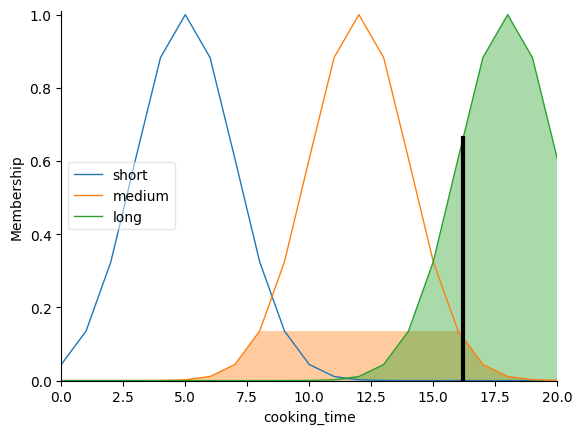

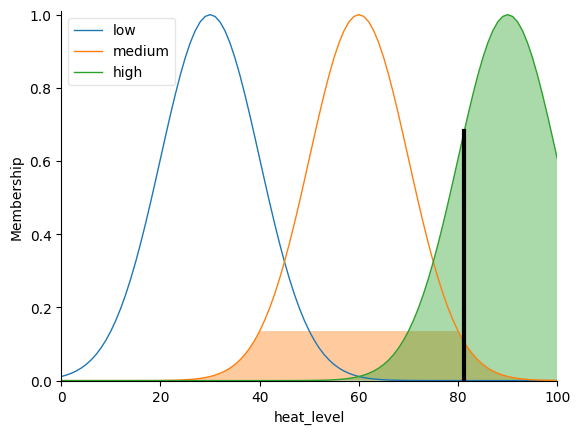

In [ ]:
#bai7
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 1010, 10), 'food_weight')
initial_temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'initial_temperature')
water_content = ctrl.Antecedent(np.arange(0, 11, 1), 'water_content')


cooking_time = ctrl.Consequent(np.arange(0, 21, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 101, 1), 'heat_level')

food_type['soft'] = fuzz.gaussmf(food_type.universe, 1, 1.5)
food_type['medium'] = fuzz.gaussmf(food_type.universe, 5, 1.5)
food_type['hard'] = fuzz.gaussmf(food_type.universe, 9, 1.5)

food_weight['light'] = fuzz.gaussmf(food_weight.universe, 200, 100)
food_weight['medium'] = fuzz.gaussmf(food_weight.universe, 500, 150)
food_weight['heavy'] = fuzz.gaussmf(food_weight.universe, 800, 150)

initial_temperature['cold'] = fuzz.gaussmf(initial_temperature.universe, 10, 5)
initial_temperature['warm'] = fuzz.gaussmf(initial_temperature.universe, 30, 5)
initial_temperature['hot'] = fuzz.gaussmf(initial_temperature.universe, 50, 5)

water_content['low'] = fuzz.gaussmf(water_content.universe, 2, 1.5)
water_content['medium'] = fuzz.gaussmf(water_content.universe, 5, 1.5)
water_content['high'] = fuzz.gaussmf(water_content.universe, 8, 1.5)

cooking_time['short'] = fuzz.gaussmf(cooking_time.universe, 5, 2)
cooking_time['medium'] = fuzz.gaussmf(cooking_time.universe, 12, 2)
cooking_time['long'] = fuzz.gaussmf(cooking_time.universe, 18, 2)

heat_level['low'] = fuzz.gaussmf(heat_level.universe, 30, 10)
heat_level['medium'] = fuzz.gaussmf(heat_level.universe, 60, 10)
heat_level['high'] = fuzz.gaussmf(heat_level.universe, 90, 10)


rule1 = ctrl.Rule(food_type['soft'], heat_level['low'])
rule2 = ctrl.Rule(food_type['medium'], heat_level['medium'])
rule3 = ctrl.Rule(food_type['hard'], heat_level['high'])

rule4 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule5 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule6 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])

rule7 = ctrl.Rule(initial_temperature['cold'], cooking_time['long'])
rule8 = ctrl.Rule(initial_temperature['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(initial_temperature['hot'], cooking_time['short'])

rule10 = ctrl.Rule(water_content['low'], heat_level['high'])
rule11 = ctrl.Rule(water_content['medium'], heat_level['medium'])
rule12 = ctrl.Rule(water_content['high'], heat_level['low'])

rule13 = ctrl.Rule(food_type['hard'] & food_weight['heavy'] & initial_temperature['cold'] & water_content['low'],
                   [cooking_time['long'], heat_level['high']])
rule14 = ctrl.Rule(food_type['soft'] & food_weight['medium'] & initial_temperature['warm'] & water_content['medium'],
                   [cooking_time['medium'], heat_level['medium']])
rule15 = ctrl.Rule(food_type['medium'] & food_weight['light'] & initial_temperature['hot'] & water_content['high'],
                   [cooking_time['short'], heat_level['low']])


pot_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
pot_system = ctrl.ControlSystemSimulation(pot_ctrl)

pot_system.input['food_type'] = 9
pot_system.input['food_weight'] = 800
pot_system.input['initial_temperature'] = 5
pot_system.input['water_content'] = 2

pot_system.compute()

print(f"Thời gian nấu dự đoán: {pot_system.output['cooking_time']:.2f} phút")
print(f"Mức nhiệt dự đoán: {pot_system.output['heat_level']:.2f}%")

cooking_time.view(sim=pot_system)
heat_level.view(sim=pot_system)


Mức độ nguy hiểm dự đoán: 64.10%


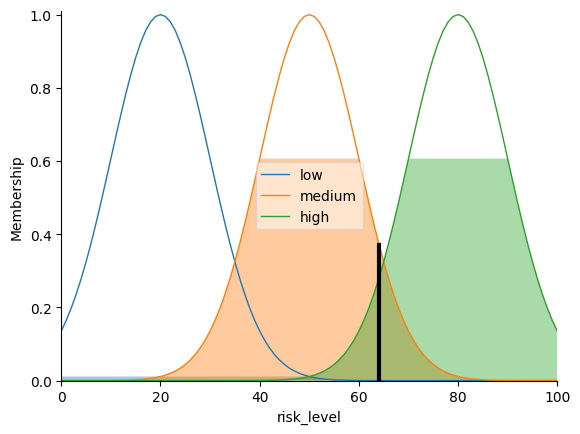

In [ ]:
#bai8
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


heart_rate = ctrl.Antecedent(np.arange(40, 181, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 181, 1), 'blood_pressure')
body_temperature = ctrl.Antecedent(np.arange(34, 41, 0.1), 'body_temperature')
oxygen_level = ctrl.Antecedent(np.arange(70, 101, 1), 'oxygen_level')


risk_level = ctrl.Consequent(np.arange(0, 101, 1), 'risk_level')


heart_rate['low'] = fuzz.gaussmf(heart_rate.universe, 50, 10)
heart_rate['normal'] = fuzz.gaussmf(heart_rate.universe, 80, 10)
heart_rate['high'] = fuzz.gaussmf(heart_rate.universe, 120, 10)

blood_pressure['low'] = fuzz.gaussmf(blood_pressure.universe, 70, 10)
blood_pressure['normal'] = fuzz.gaussmf(blood_pressure.universe, 120, 10)
blood_pressure['high'] = fuzz.gaussmf(blood_pressure.universe, 160, 10)

body_temperature['low'] = fuzz.gaussmf(body_temperature.universe, 35, 0.5)
body_temperature['normal'] = fuzz.gaussmf(body_temperature.universe, 37, 0.5)
body_temperature['high'] = fuzz.gaussmf(body_temperature.universe, 39, 0.5)

oxygen_level['dangerous'] = fuzz.gaussmf(oxygen_level.universe, 75, 5)
oxygen_level['medium'] = fuzz.gaussmf(oxygen_level.universe, 85, 5)
oxygen_level['good'] = fuzz.gaussmf(oxygen_level.universe, 95, 5)

risk_level['low'] = fuzz.gaussmf(risk_level.universe, 20, 10)
risk_level['medium'] = fuzz.gaussmf(risk_level.universe, 50, 10)
risk_level['high'] = fuzz.gaussmf(risk_level.universe, 80, 10)


rule1 = ctrl.Rule(heart_rate['low'] | heart_rate['high'], risk_level['high'])
rule2 = ctrl.Rule(heart_rate['normal'], risk_level['low'])

rule3 = ctrl.Rule(blood_pressure['low'] | blood_pressure['high'], risk_level['high'])
rule4 = ctrl.Rule(blood_pressure['normal'], risk_level['low'])

rule5 = ctrl.Rule(body_temperature['low'] | body_temperature['high'], risk_level['medium'])
rule6 = ctrl.Rule(body_temperature['normal'], risk_level['low'])

rule7 = ctrl.Rule(oxygen_level['dangerous'], risk_level['high'])
rule8 = ctrl.Rule(oxygen_level['medium'], risk_level['medium'])
rule9 = ctrl.Rule(oxygen_level['good'], risk_level['low'])

rule10 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'] & oxygen_level['dangerous'], risk_level['high'])
rule11 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'] & oxygen_level['good'], risk_level['low'])
rule12 = ctrl.Rule(body_temperature['high'] & blood_pressure['low'] & oxygen_level['medium'], risk_level['medium'])


patient_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
patient_system = ctrl.ControlSystemSimulation(patient_ctrl)


patient_system.input['heart_rate'] = 130
patient_system.input['blood_pressure'] = 150
patient_system.input['body_temperature'] = 38.5
patient_system.input['oxygen_level'] = 80


patient_system.compute()


print(f"Mức độ nguy hiểm dự đoán: {patient_system.output['risk_level']:.2f}%")


risk_level.view(sim=patient_system)





Thời gian đèn xanh dự đoán: 81.37 giây


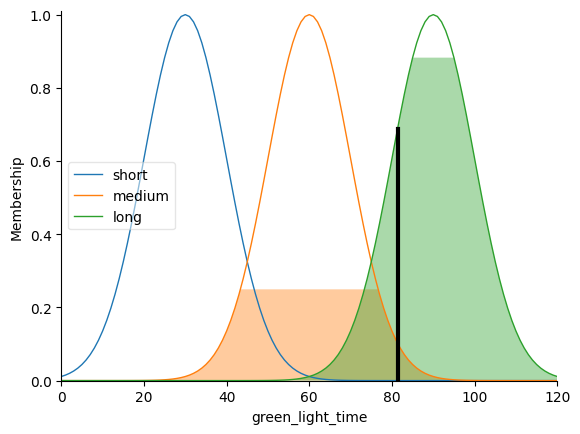

In [ ]:
#bai9
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

main_road_density = ctrl.Antecedent(np.arange(0, 101, 1), 'main_road_density')
side_road_density = ctrl.Antecedent(np.arange(0, 101, 1), 'side_road_density')
waiting_time = ctrl.Antecedent(np.arange(0, 301, 1), 'waiting_time')


green_light_time = ctrl.Consequent(np.arange(0, 121, 1), 'green_light_time')

main_road_density['low'] = fuzz.gaussmf(main_road_density.universe, 20, 10)
main_road_density['medium'] = fuzz.gaussmf(main_road_density.universe, 50, 10)
main_road_density['high'] = fuzz.gaussmf(main_road_density.universe, 80, 10)

side_road_density['low'] = fuzz.gaussmf(side_road_density.universe, 20, 10)
side_road_density['medium'] = fuzz.gaussmf(side_road_density.universe, 50, 10)
side_road_density['high'] = fuzz.gaussmf(side_road_density.universe, 80, 10)

waiting_time['short'] = fuzz.gaussmf(waiting_time.universe, 60, 20)
waiting_time['medium'] = fuzz.gaussmf(waiting_time.universe, 150, 30)
waiting_time['long'] = fuzz.gaussmf(waiting_time.universe, 240, 30)

green_light_time['short'] = fuzz.gaussmf(green_light_time.universe, 30, 10)
green_light_time['medium'] = fuzz.gaussmf(green_light_time.universe, 60, 10)
green_light_time['long'] = fuzz.gaussmf(green_light_time.universe, 90, 10)

rule1 = ctrl.Rule(main_road_density['high'], green_light_time['long'])
rule2 = ctrl.Rule(main_road_density['medium'], green_light_time['medium'])
rule3 = ctrl.Rule(main_road_density['low'], green_light_time['short'])

rule4 = ctrl.Rule(side_road_density['high'], green_light_time['short'])
rule5 = ctrl.Rule(side_road_density['medium'], green_light_time['medium'])
rule6 = ctrl.Rule(side_road_density['low'], green_light_time['long'])

rule7 = ctrl.Rule(waiting_time['long'], green_light_time['long'])
rule8 = ctrl.Rule(waiting_time['medium'], green_light_time['medium'])
rule9 = ctrl.Rule(waiting_time['short'], green_light_time['short'])

rule10 = ctrl.Rule(main_road_density['high'] & side_road_density['low'] & waiting_time['long'], green_light_time['long'])
rule11 = ctrl.Rule(main_road_density['medium'] & side_road_density['medium'] & waiting_time['medium'], green_light_time['medium'])
rule12 = ctrl.Rule(main_road_density['low'] & side_road_density['high'] & waiting_time['short'], green_light_time['short'])

traffic_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
traffic_system = ctrl.ControlSystemSimulation(traffic_ctrl)

traffic_system.input['main_road_density'] = 75
traffic_system.input['side_road_density'] = 30
traffic_system.input['waiting_time'] = 200

traffic_system.compute()

print(f"Thời gian đèn xanh dự đoán: {traffic_system.output['green_light_time']:.2f} giây")

green_light_time.view(sim=traffic_system)



Mức giảm tiếng ồn dự đoán: 73.94%


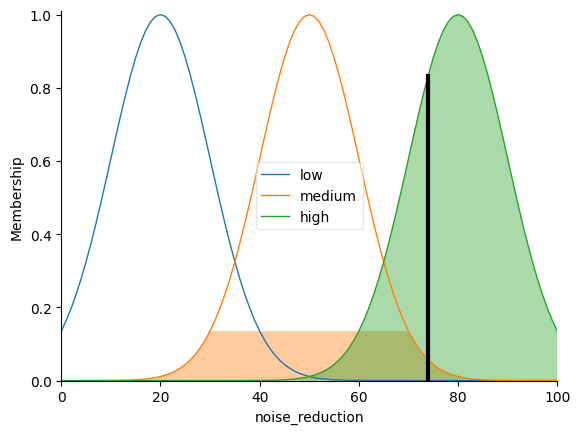

In [ ]:
#bai10
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


noise_level = ctrl.Antecedent(np.arange(30, 101, 1), 'noise_level')
crowd_density = ctrl.Antecedent(np.arange(0, 11, 1), 'crowd_density')
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')


noise_reduction = ctrl.Consequent(np.arange(0, 101, 1), 'noise_reduction')


noise_level['low'] = fuzz.gaussmf(noise_level.universe, 40, 10)
noise_level['medium'] = fuzz.gaussmf(noise_level.universe, 65, 10)
noise_level['high'] = fuzz.gaussmf(noise_level.universe, 90, 10)

crowd_density['low'] = fuzz.gaussmf(crowd_density.universe, 2, 1.5)
crowd_density['medium'] = fuzz.gaussmf(crowd_density.universe, 5, 1.5)
crowd_density['high'] = fuzz.gaussmf(crowd_density.universe, 8, 1.5)

time_of_day['morning'] = fuzz.gaussmf(time_of_day.universe, 8, 2)
time_of_day['afternoon'] = fuzz.gaussmf(time_of_day.universe, 14, 2)
time_of_day['night'] = fuzz.gaussmf(time_of_day.universe, 22, 2)

noise_reduction['low'] = fuzz.gaussmf(noise_reduction.universe, 20, 10)
noise_reduction['medium'] = fuzz.gaussmf(noise_reduction.universe, 50, 10)
noise_reduction['high'] = fuzz.gaussmf(noise_reduction.universe, 80, 10)


rule1 = ctrl.Rule(noise_level['high'], noise_reduction['high'])
rule2 = ctrl.Rule(noise_level['medium'], noise_reduction['medium'])
rule3 = ctrl.Rule(noise_level['low'], noise_reduction['low'])

rule4 = ctrl.Rule(crowd_density['high'], noise_reduction['high'])
rule5 = ctrl.Rule(crowd_density['medium'], noise_reduction['medium'])
rule6 = ctrl.Rule(crowd_density['low'], noise_reduction['low'])

rule7 = ctrl.Rule(time_of_day['night'], noise_reduction['high'])
rule8 = ctrl.Rule(time_of_day['afternoon'], noise_reduction['medium'])
rule9 = ctrl.Rule(time_of_day['morning'], noise_reduction['low'])

rule10 = ctrl.Rule(noise_level['high'] & crowd_density['high'] & time_of_day['night'], noise_reduction['high'])
rule11 = ctrl.Rule(noise_level['medium'] & crowd_density['medium'] & time_of_day['afternoon'], noise_reduction['medium'])
rule12 = ctrl.Rule(noise_level['low'] & crowd_density['low'] & time_of_day['morning'], noise_reduction['low'])


noise_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
noise_system = ctrl.ControlSystemSimulation(noise_ctrl)


noise_system.input['noise_level'] = 85
noise_system.input['crowd_density'] = 8
noise_system.input['time_of_day'] = 22


noise_system.compute()

print(f"Mức giảm tiếng ồn dự đoán: {noise_system.output['noise_reduction']:.2f}%")

noise_reduction.view(sim=noise_system)


Mức lọc không khí dự đoán: 73.78%


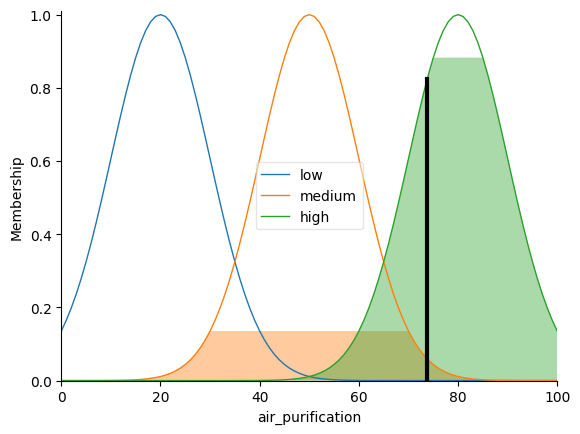

In [ ]:
#bai11
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


pm25 = ctrl.Antecedent(np.arange(0, 301, 1), 'pm25')
co2 = ctrl.Antecedent(np.arange(300, 2001, 1), 'co2')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')


air_purification = ctrl.Consequent(np.arange(0, 101, 1), 'air_purification')


pm25['low'] = fuzz.gaussmf(pm25.universe, 50, 20)
pm25['medium'] = fuzz.gaussmf(pm25.universe, 150, 30)
pm25['high'] = fuzz.gaussmf(pm25.universe, 250, 30)

co2['low'] = fuzz.gaussmf(co2.universe, 600, 100)
co2['medium'] = fuzz.gaussmf(co2.universe, 1200, 200)
co2['high'] = fuzz.gaussmf(co2.universe, 1800, 200)

humidity['low'] = fuzz.gaussmf(humidity.universe, 20, 10)
humidity['medium'] = fuzz.gaussmf(humidity.universe, 50, 10)
humidity['high'] = fuzz.gaussmf(humidity.universe, 80, 10)

air_purification['low'] = fuzz.gaussmf(air_purification.universe, 20, 10)
air_purification['medium'] = fuzz.gaussmf(air_purification.universe, 50, 10)
air_purification['high'] = fuzz.gaussmf(air_purification.universe, 80, 10)


rule1 = ctrl.Rule(pm25['high'], air_purification['high'])
rule2 = ctrl.Rule(pm25['medium'], air_purification['medium'])
rule3 = ctrl.Rule(pm25['low'], air_purification['low'])

rule4 = ctrl.Rule(co2['high'], air_purification['high'])
rule5 = ctrl.Rule(co2['medium'], air_purification['medium'])
rule6 = ctrl.Rule(co2['low'], air_purification['low'])

rule7 = ctrl.Rule(humidity['high'], air_purification['low'])
rule8 = ctrl.Rule(humidity['medium'], air_purification['medium'])
rule9 = ctrl.Rule(humidity['low'], air_purification['high'])

rule10 = ctrl.Rule(pm25['high'] & co2['high'] & humidity['low'], air_purification['high'])
rule11 = ctrl.Rule(pm25['medium'] & co2['medium'] & humidity['medium'], air_purification['medium'])
rule12 = ctrl.Rule(pm25['low'] & co2['low'] & humidity['high'], air_purification['low'])

air_quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
air_quality_system = ctrl.ControlSystemSimulation(air_quality_ctrl)


air_quality_system.input['pm25'] = 220
air_quality_system.input['co2'] = 1700
air_quality_system.input['humidity'] = 30


air_quality_system.compute()


print(f"Mức lọc không khí dự đoán: {air_quality_system.output['air_purification']:.2f}%")


air_purification.view(sim=air_quality_system)


Thời gian giặt dự đoán: 32.40 phút
Mực nước dự đoán: 5.25


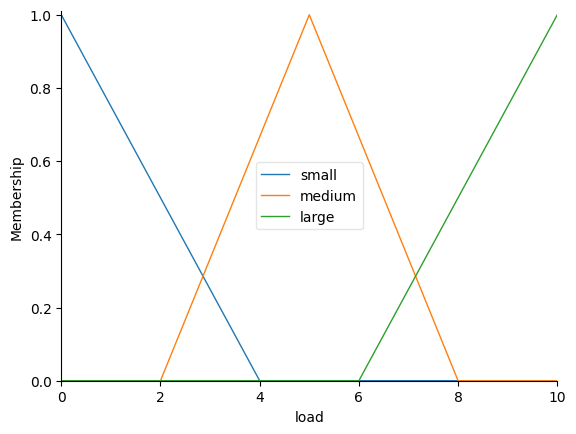

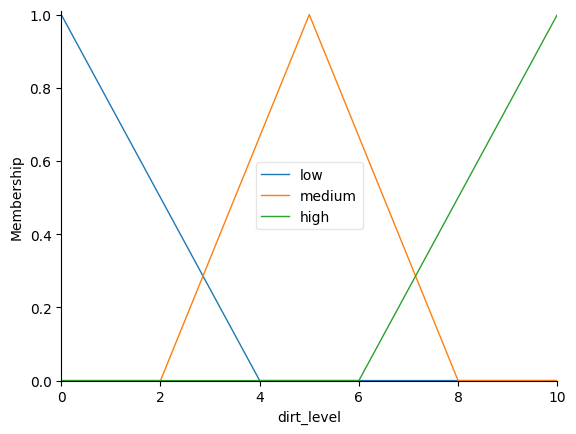

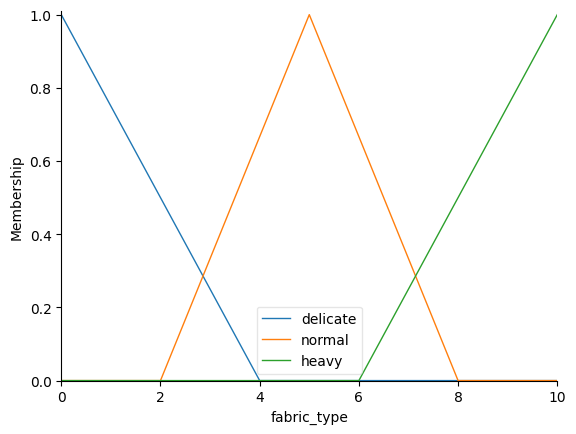

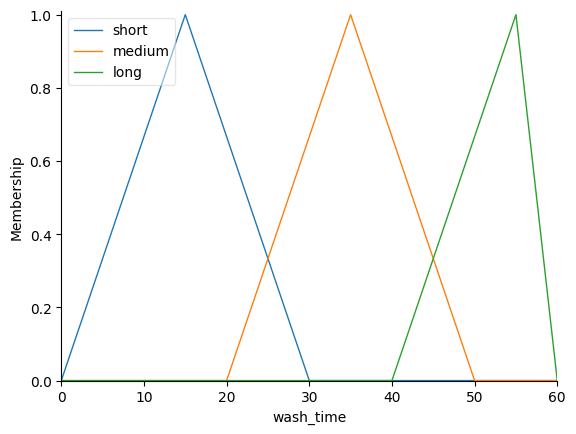

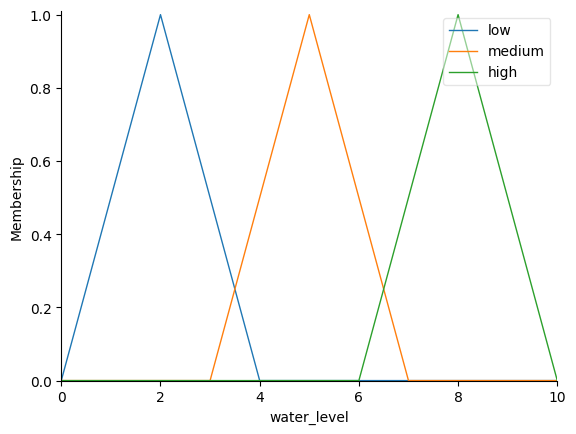

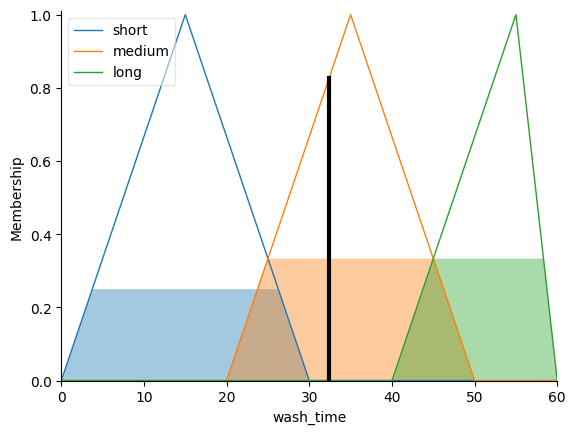

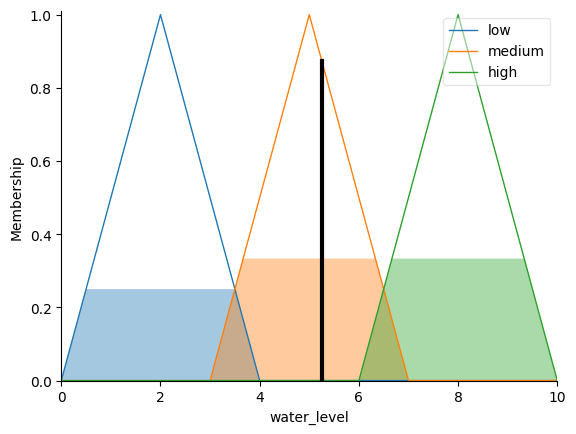

In [ ]:
#bai4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')


wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'water_level')


load['small'] = fuzz.trimf(load.universe, [0, 0, 4])
load['medium'] = fuzz.trimf(load.universe, [2, 5, 8])
load['large'] = fuzz.trimf(load.universe, [6, 10, 10])

dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 0, 4])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [2, 5, 8])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [6, 10, 10])

fabric_type['delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 4])
fabric_type['normal'] = fuzz.trimf(fabric_type.universe, [2, 5, 8])
fabric_type['heavy'] = fuzz.trimf(fabric_type.universe, [6, 10, 10])

wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 15, 30])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [20, 35, 50])
wash_time['long'] = fuzz.trimf(wash_time.universe, [40, 55, 60])

water_level['low'] = fuzz.trimf(water_level.universe, [0, 2, 4])
water_level['medium'] = fuzz.trimf(water_level.universe, [3, 5, 7])
water_level['high'] = fuzz.trimf(water_level.universe, [6, 8, 10])


load.view()
dirt_level.view()
fabric_type.view()
wash_time.view()
water_level.view()


rule1 = ctrl.Rule(load['small'] & dirt_level['low'], [wash_time['short'], water_level['low']])
rule2 = ctrl.Rule(load['small'] & dirt_level['medium'], [wash_time['medium'], water_level['medium']])
rule3 = ctrl.Rule(load['small'] & dirt_level['high'], [wash_time['long'], water_level['medium']])

rule4 = ctrl.Rule(load['medium'] & dirt_level['low'], [wash_time['medium'], water_level['medium']])
rule5 = ctrl.Rule(load['medium'] & dirt_level['medium'], [wash_time['long'], water_level['medium']])
rule6 = ctrl.Rule(load['medium'] & dirt_level['high'], [wash_time['long'], water_level['high']])

rule7 = ctrl.Rule(load['large'] & dirt_level['low'], [wash_time['medium'], water_level['high']])
rule8 = ctrl.Rule(load['large'] & dirt_level['medium'], [wash_time['long'], water_level['high']])
rule9 = ctrl.Rule(load['large'] & dirt_level['high'], [wash_time['long'], water_level['high']])

rule10 = ctrl.Rule(fabric_type['delicate'], [wash_time['short'], water_level['low']])
rule11 = ctrl.Rule(fabric_type['normal'], [wash_time['medium'], water_level['medium']])
rule12 = ctrl.Rule(fabric_type['heavy'], [wash_time['long'], water_level['high']])


washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
washing_system = ctrl.ControlSystemSimulation(washing_ctrl)

washing_system.input['load'] = 7
washing_system.input['dirt_level'] = 8
washing_system.input['fabric_type'] = 3

washing_system.compute()


print(f"Thời gian giặt dự đoán: {washing_system.output['wash_time']:.2f} phút")
print(f"Mực nước dự đoán: {washing_system.output['water_level']:.2f}")

wash_time.view(sim=washing_system)
water_level.view(sim=washing_system)


Thời gian nấu dự đoán: 17.22 phút
Mức công suất dự đoán: 86.50%


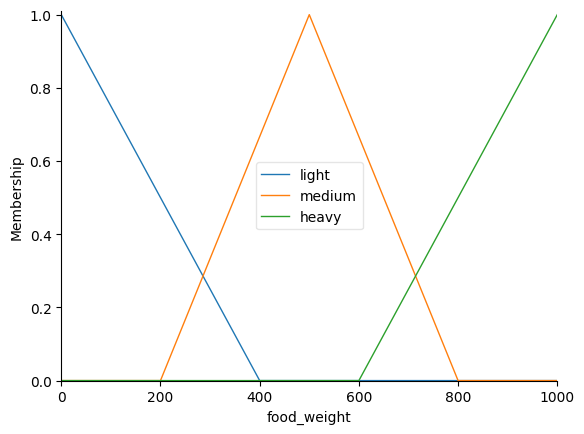

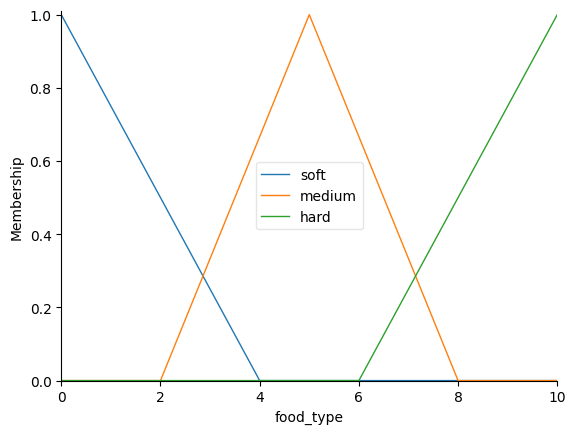

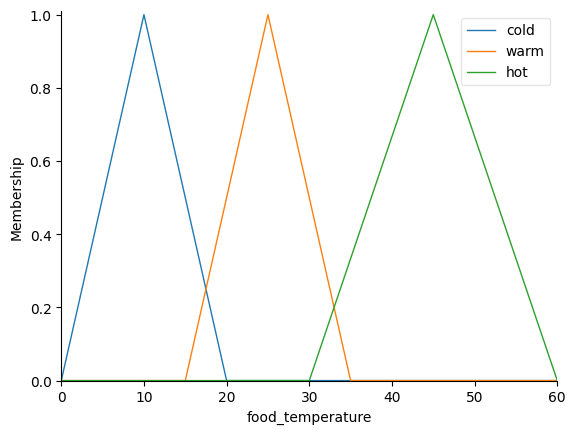

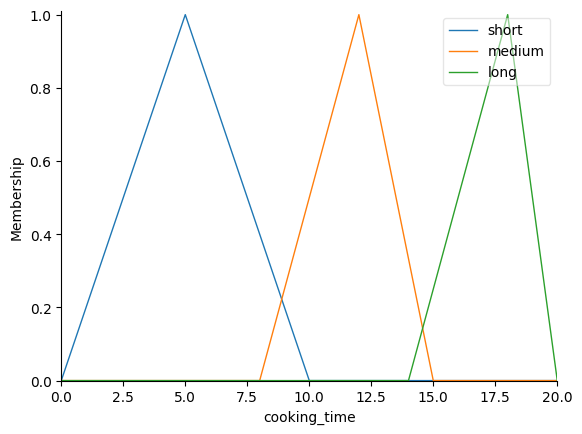

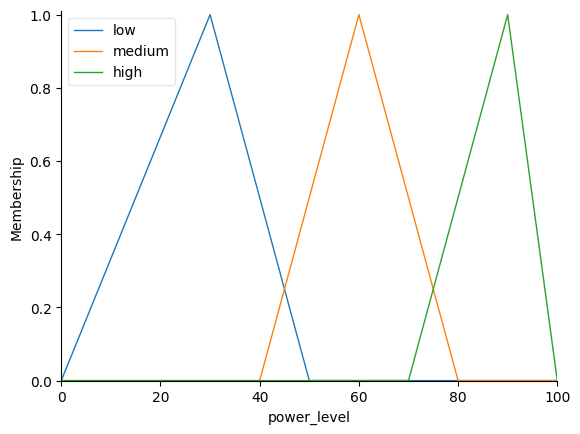

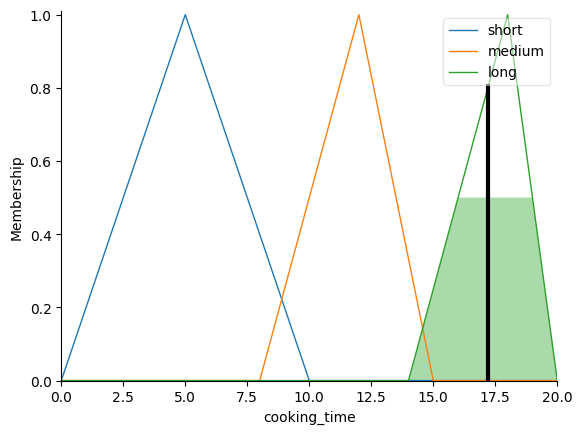

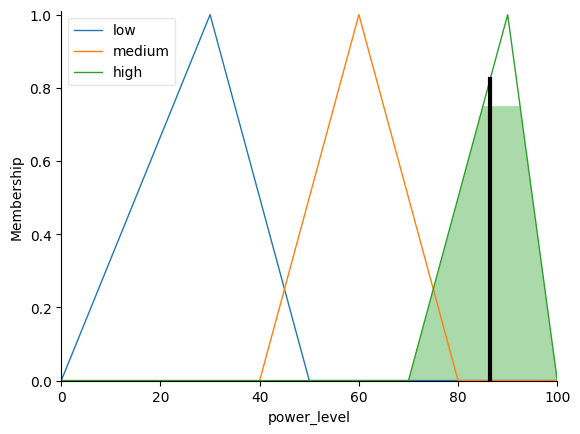

In [ ]:
#bai5
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


food_weight = ctrl.Antecedent(np.arange(0, 1010, 10), 'food_weight')
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'food_temperature')


cooking_time = ctrl.Consequent(np.arange(0, 21, 1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'power_level')


food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 0, 400])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [200, 500, 800])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [600, 1000, 1000])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 4])
food_type['medium'] = fuzz.trimf(food_type.universe, [2, 5, 8])
food_type['hard'] = fuzz.trimf(food_type.universe, [6, 10, 10])

food_temperature['cold'] = fuzz.trimf(food_temperature.universe, [0, 10, 20])
food_temperature['warm'] = fuzz.trimf(food_temperature.universe, [15, 25, 35])
food_temperature['hot'] = fuzz.trimf(food_temperature.universe, [30, 45, 60])

cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 5, 10])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [8, 12, 15])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [14, 18, 20])

power_level['low'] = fuzz.trimf(power_level.universe, [0, 30, 50])
power_level['medium'] = fuzz.trimf(power_level.universe, [40, 60, 80])
power_level['high'] = fuzz.trimf(power_level.universe, [70, 90, 100])


food_weight.view()
food_type.view()
food_temperature.view()
cooking_time.view()
power_level.view()


rule1 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])

rule4 = ctrl.Rule(food_type['soft'], power_level['low'])
rule5 = ctrl.Rule(food_type['medium'], power_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], power_level['high'])

rule7 = ctrl.Rule(food_temperature['cold'], cooking_time['long'])
rule8 = ctrl.Rule(food_temperature['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(food_temperature['hot'], cooking_time['short'])

rule10 = ctrl.Rule(food_weight['heavy'] & food_type['hard'] & food_temperature['cold'],
                   [cooking_time['long'], power_level['high']])
rule11 = ctrl.Rule(food_weight['medium'] & food_type['soft'] & food_temperature['warm'],
                   [cooking_time['medium'], power_level['low']])
rule12 = ctrl.Rule(food_weight['light'] & food_type['medium'] & food_temperature['hot'],
                   [cooking_time['short'], power_level['medium']])


microwave_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
microwave_system = ctrl.ControlSystemSimulation(microwave_ctrl)


microwave_system.input['food_weight'] = 800
microwave_system.input['food_type'] = 9
microwave_system.input['food_temperature'] = 5


microwave_system.compute()


print(f"Thời gian nấu dự đoán: {microwave_system.output['cooking_time']:.2f} phút")
print(f"Mức công suất dự đoán: {microwave_system.output['power_level']:.2f}%")


cooking_time.view(sim=microwave_system)
power_level.view(sim=microwave_system)


Tốc độ quạt dự đoán: 58.56%
Mức độ làm mát dự đoán: 60.36%


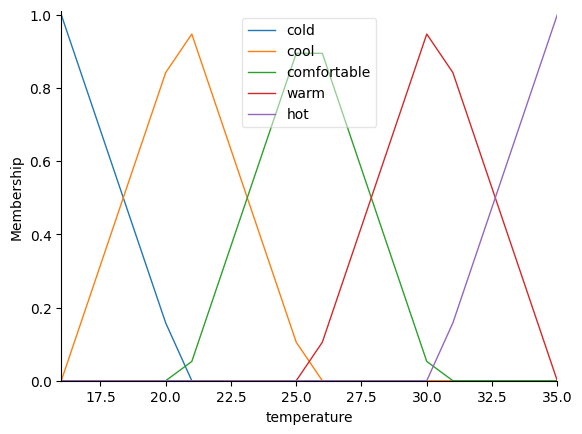

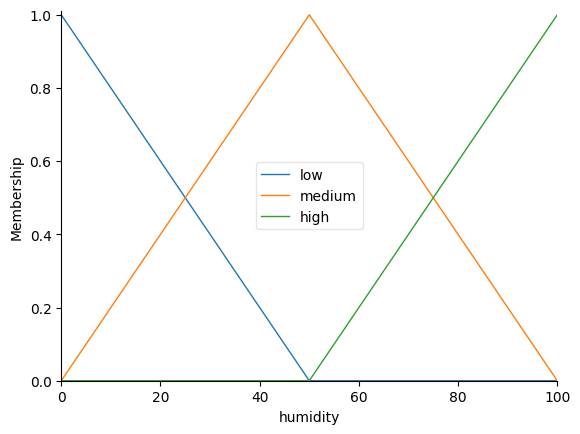

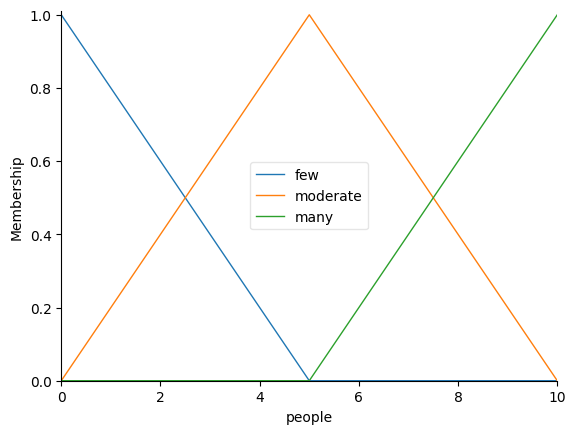

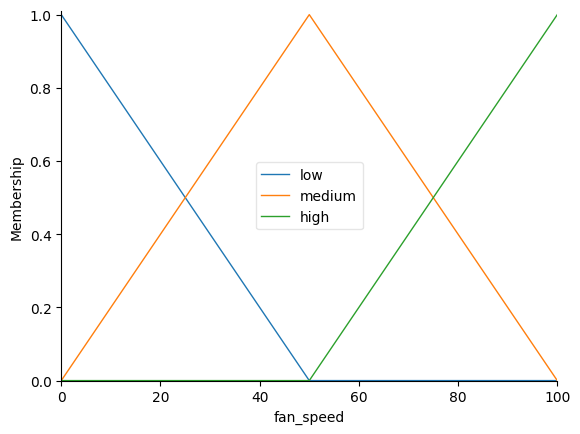

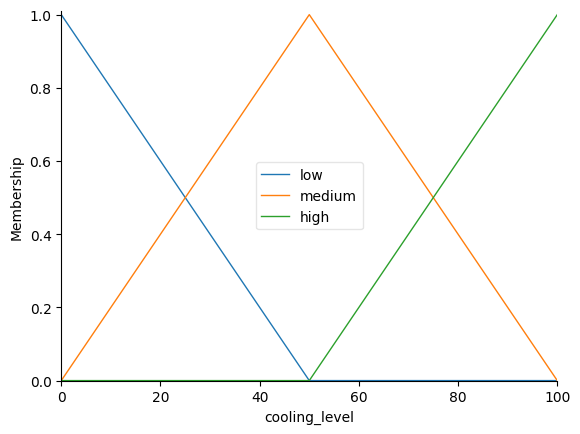

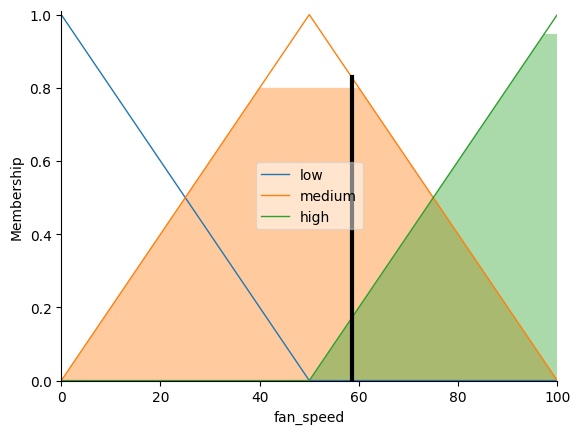

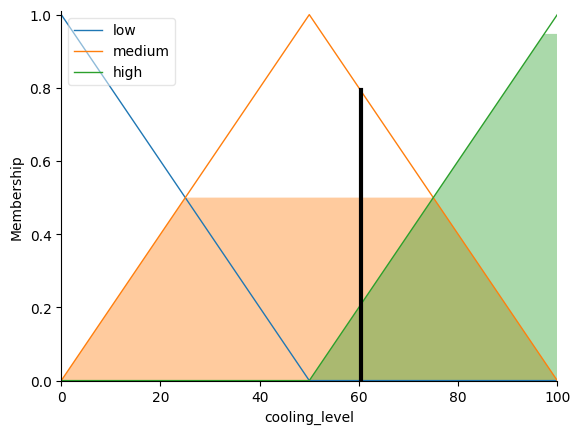

In [ ]:
#bai6
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(16, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(0, 11, 1), 'people')


fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_level')


temperature.automf(names=['cold', 'cool', 'comfortable', 'warm', 'hot'])
humidity.automf(names=['low', 'medium', 'high'])
people.automf(names=['few', 'moderate', 'many'])

fan_speed.automf(names=['low', 'medium', 'high'])
cooling_level.automf(names=['low', 'medium', 'high'])


temperature.view()
humidity.view()
people.view()
fan_speed.view()
cooling_level.view()


rule1 = ctrl.Rule(temperature['cold'], [fan_speed['low'], cooling_level['low']])
rule2 = ctrl.Rule(temperature['cool'], [fan_speed['low'], cooling_level['low']])
rule3 = ctrl.Rule(temperature['comfortable'], [fan_speed['medium'], cooling_level['medium']])
rule4 = ctrl.Rule(temperature['warm'], [fan_speed['high'], cooling_level['high']])
rule5 = ctrl.Rule(temperature['hot'], [fan_speed['high'], cooling_level['high']])

rule6 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule7 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule8 = ctrl.Rule(humidity['high'], cooling_level['high'])

rule9 = ctrl.Rule(people['few'], fan_speed['low'])
rule10 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule11 = ctrl.Rule(people['many'], fan_speed['high'])

rule12 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'], [fan_speed['high'], cooling_level['high']])
rule13 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'], [fan_speed['medium'], cooling_level['medium']])
rule14 = ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'], [fan_speed['low'], cooling_level['low']])


ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
ac_system = ctrl.ControlSystemSimulation(ac_ctrl)

ac_system.input['temperature'] = 30
ac_system.input['humidity'] = 75
ac_system.input['people'] = 6


ac_system.compute()


print(f"Tốc độ quạt dự đoán: {ac_system.output['fan_speed']:.2f}%")
print(f"Mức độ làm mát dự đoán: {ac_system.output['cooling_level']:.2f}%")


fan_speed.view(sim=ac_system)
cooling_level.view(sim=ac_system)


ValueError: Membership function 'very_low' does not exist for Antecedent demand.
Available options: 'low'; 'medium', or 'high'.

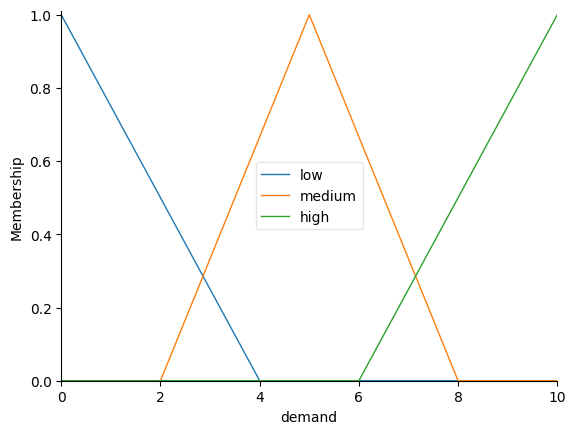

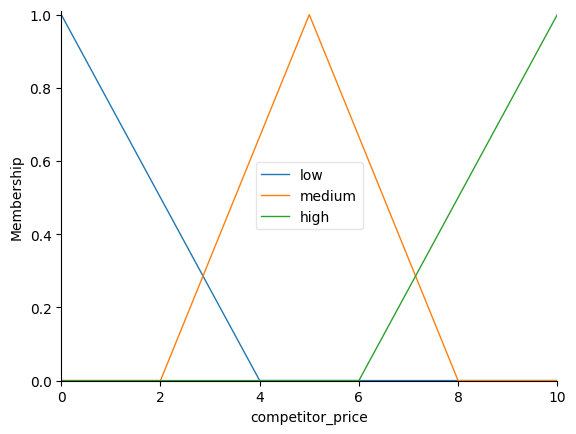

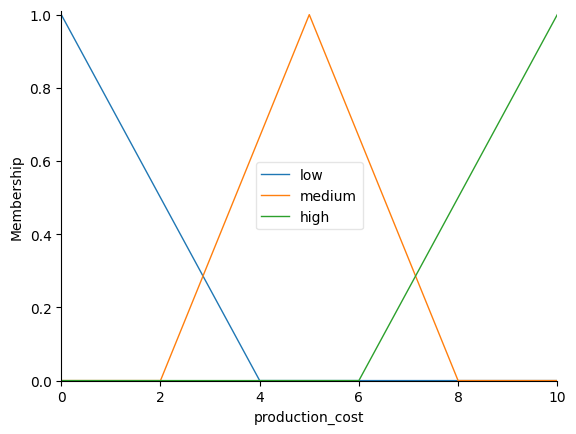

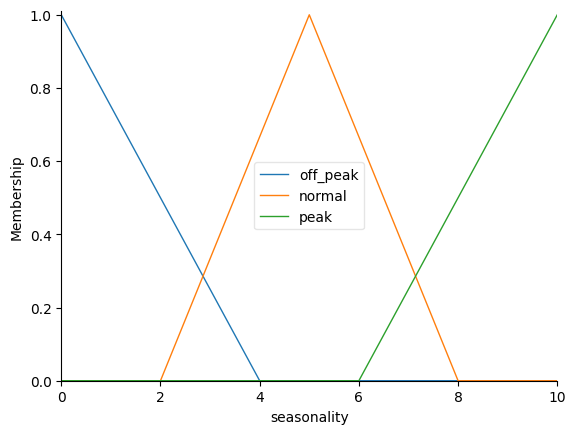

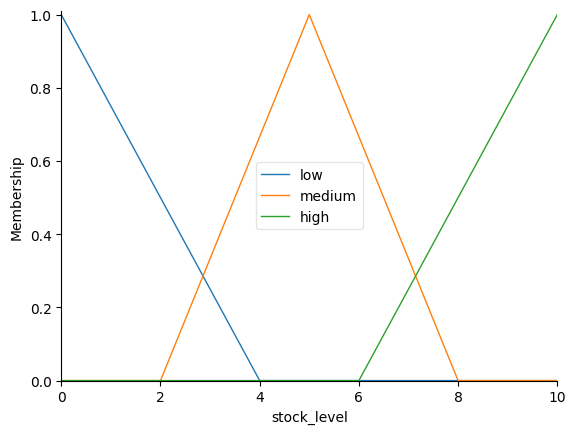

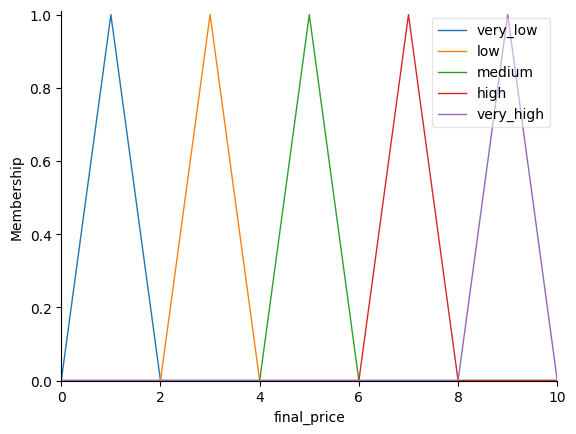

In [ ]:
#bai3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


demand = ctrl.Antecedent(np.arange(0, 11, 1), 'demand')
competitor_price = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')


final_price = ctrl.Consequent(np.arange(0, 11, 1), 'final_price')


demand['low'] = fuzz.trimf(demand.universe, [0, 0, 4])
demand['medium'] = fuzz.trimf(demand.universe, [2, 5, 8])
demand['high'] = fuzz.trimf(demand.universe, [6, 10, 10])

competitor_price['low'] = fuzz.trimf(competitor_price.universe, [0, 0, 4])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe, [2, 5, 8])
competitor_price['high'] = fuzz.trimf(competitor_price.universe, [6, 10, 10])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 4])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [2, 5, 8])
production_cost['high'] = fuzz.trimf(production_cost.universe, [6, 10, 10])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 4])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [2, 5, 8])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [6, 10, 10])

stock_level['low'] = fuzz.trimf(stock_level.universe, [0, 0, 4])
stock_level['medium'] = fuzz.trimf(stock_level.universe, [2, 5, 8])
stock_level['high'] = fuzz.trimf(stock_level.universe, [6, 10, 10])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 1, 2])
final_price['low'] = fuzz.trimf(final_price.universe, [2, 3, 4])
final_price['medium'] = fuzz.trimf(final_price.universe, [4, 5, 6])
final_price['high'] = fuzz.trimf(final_price.universe, [6, 7, 8])
final_price['very_high'] = fuzz.trimf(final_price.universe, [8, 9, 10])


demand.view()
competitor_price.view()
production_cost.view()
seasonality.view()
stock_level.view()
final_price.view()

rule1 = ctrl.Rule(demand['high'] & competitor_price['high'] & stock_level['low'], final_price['very_high'])
rule2 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(demand['medium'] & production_cost['high'] & stock_level['low'], final_price['very_high'])

rule4 = ctrl.Rule(demand['high'] & competitor_price['medium'] & stock_level['medium'], final_price['high'])
rule5 = ctrl.Rule(demand['medium'] & competitor_price['high'] & stock_level['low'], final_price['high'])
rule6 = ctrl.Rule(demand['medium'] & seasonality['peak'] & stock_level['medium'], final_price['high'])

rule7 = ctrl.Rule(demand['medium'] & competitor_price['medium'] & stock_level['medium'], final_price['medium'])
rule8 = ctrl.Rule(demand['low'] & competitor_price['high'] & stock_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(demand['medium'] & production_cost['medium'] & stock_level['medium'], final_price['medium'])

rule10 = ctrl.Rule(demand['low'] & competitor_price['low'] & stock_level['high'], final_price['low'])
rule11 = ctrl.Rule(demand['medium'] & production_cost['low'] & stock_level['high'], final_price['low'])
rule12 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['low'])

rule13 = ctrl.Rule(demand['low'] & competitor_price['low'] & stock_level['high'], final_price['very_low'])
rule14 = ctrl.Rule(demand['very_low'] & seasonality['off_peak'] & stock_level['high'], final_price['very_low'])


pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
pricing_system = ctrl.ControlSystemSimulation(pricing_ctrl)


pricing_system.input['demand'] = 7
pricing_system.input['competitor_price'] = 5
pricing_system.input['production_cost'] = 6
pricing_system.input['seasonality'] = 8
pricing_system.input['stock_level'] = 3

pricing_system.compute()

print(f"Giá sản phẩm dự đoán: {pricing_system.output['final_price']:.2f}")

final_price.view(sim=pricing_system)


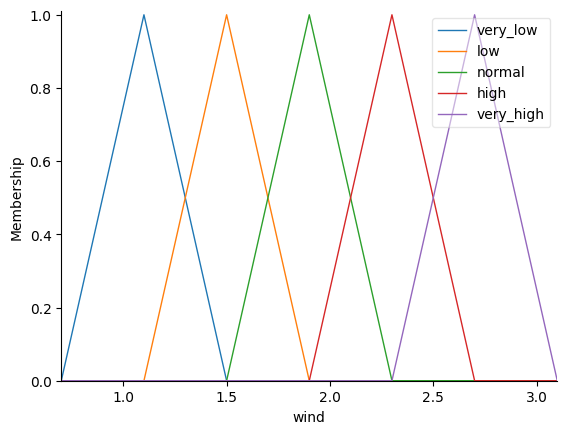

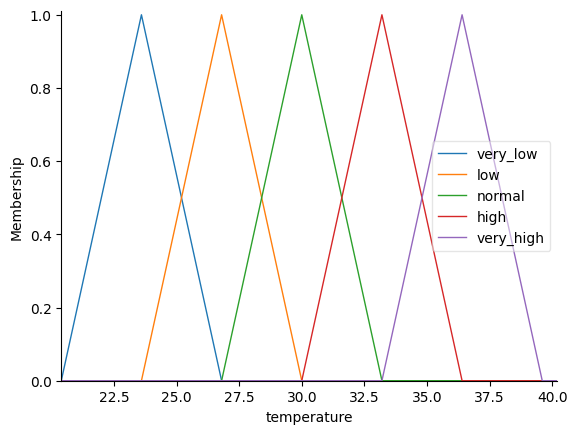

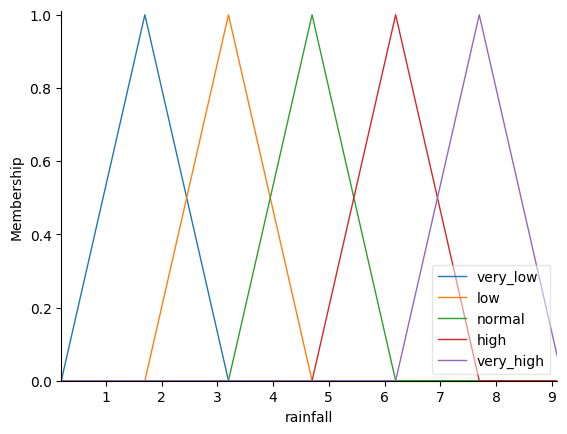

In [ ]:
#bai1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])
temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])
rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

wind.view()
temperature.view()
rainfall.view()

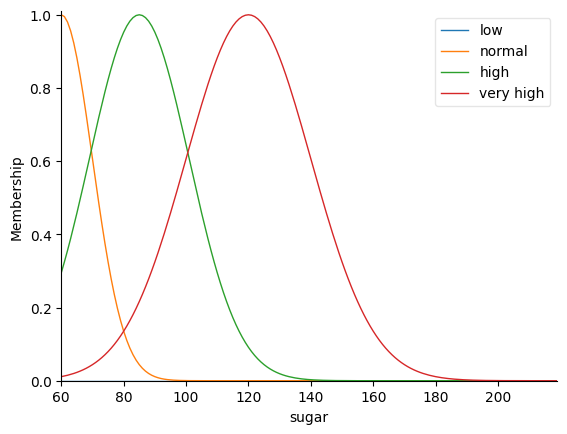

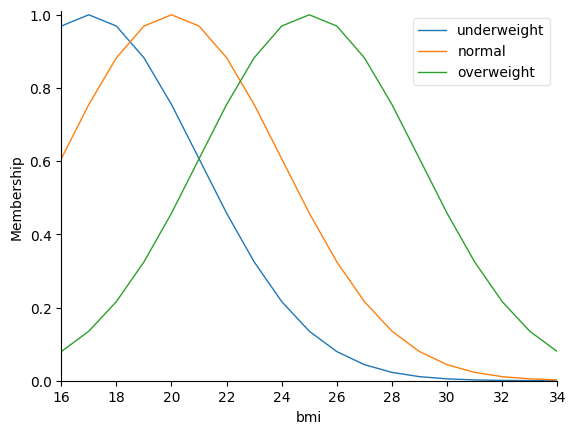

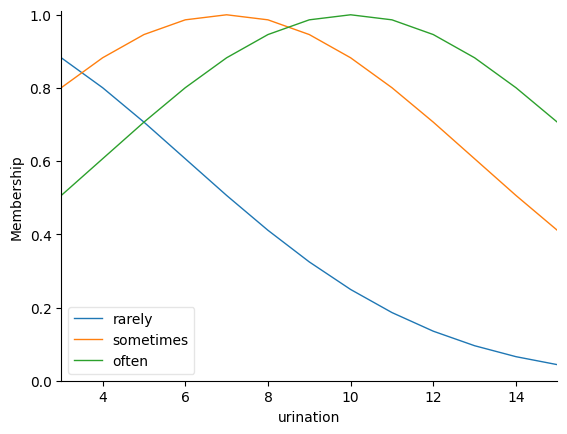

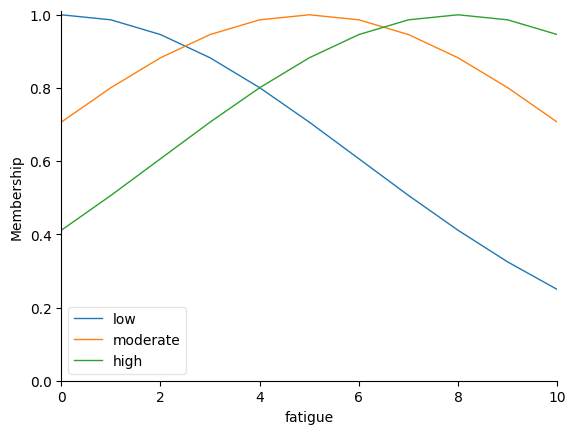

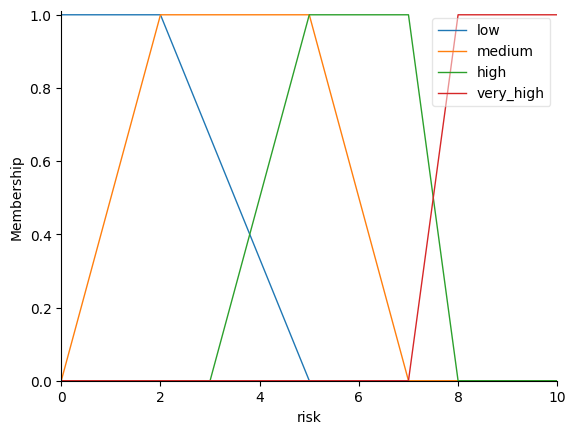

In [ ]:
#bai2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sugar = ctrl.Antecedent(np.arange(60, 220, 1), 'sugar')
bmi = ctrl.Antecedent(np.arange(16, 35 , 1), 'bmi')
urination = ctrl.Antecedent(np.arange( 3, 16, 1), 'urination')
fatigue = ctrl.Consequent(np.arange(0, 11, 1), 'fatigue')
risk = ctrl.Consequent(np.arange(0, 11, 1), 'risk')

sugar['low'] = fuzz.gaussmf(sugar.universe, 0,8)
sugar['normal'] = fuzz.gaussmf(sugar.universe, 60,10)
sugar['high'] = fuzz.gaussmf(sugar.universe, 85,16)
sugar['very high'] = fuzz.gaussmf(sugar.universe, 120,20)

bmi['underweight'] = fuzz.gaussmf(bmi.universe, 17, 4)
bmi['normal'] = fuzz.gaussmf(bmi.universe, 20, 4)
bmi['overweight'] = fuzz.gaussmf(bmi.universe, 25, 4)

urination['rarely'] = fuzz.gaussmf(urination.universe, 0, 6)
urination['sometimes'] = fuzz.gaussmf(urination.universe, 7, 6)
urination['often'] = fuzz.gaussmf(urination.universe, 10, 6 )

fatigue['low'] = fuzz.gaussmf(fatigue.universe, 0, 6)
fatigue['moderate'] = fuzz.gaussmf(fatigue.universe, 5, 6)
fatigue['high'] = fuzz.gaussmf(fatigue.universe, 8, 6)

risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 2, 5])
risk['medium'] = fuzz.trapmf(risk.universe, [0, 2, 5, 7])
risk['high'] = fuzz.trapmf(risk.universe, [3, 5, 7, 8])
risk['very_high'] = fuzz.trapmf(risk.universe, [7, 8, 10, 11 ])


rule1 = ctrl.Rule(sugar['high'] & urination['often'], risk['very_high'])
rule2 = ctrl.Rule(sugar['high'] & urination['sometimes'], risk['high'])
rule3 = ctrl.Rule(sugar['normal'] & urination['rarely'], risk['low'])
rule4 = ctrl.Rule(sugar['high'] & bmi['overweight'], risk['high'])
rule5 = ctrl.Rule(sugar['high'] & fatigue['high'], risk['very_high'])
rule6 = ctrl.Rule(sugar['normal'] & bmi['normal'], risk['low'])
rule7 = ctrl.Rule(sugar['high'] & bmi['overweight'], risk['medium'])
rule8 = ctrl.Rule(sugar['high'] & fatigue['moderate'], risk['medium'])
rule9 = ctrl.Rule(sugar['low'] & bmi['underweight'], risk['low'])


sugar.view()
bmi.view()
urination.view()
fatigue.view()
risk.view()





